In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Notebook to generate figures related to the Planet Hunters TESS sample of planet candidates. 

More information on how the planet parameters were derived can be found in [Eisner et al. 2021](https://arxiv.org/abs/2011.13944). All below plots and captions were generated for PostDoc applications 2021. 

In [2]:
# all TOIs as of 13th October 2021 - updated list can be downlaoded from https://exofop.ipac.caltech.edu/tess/view_toi.php
tois = pd.read_csv('./TOI_list.csv', comment = '#')

# the PHT tess candidate list 
ctois = pd.read_csv('./PHT_candidates_info.csv')


In [3]:
# planet candidates uploaded to exofop by the PHT team
candidates_pht = ctois[np.isfinite(ctois['depth_PHT']) == True]

# planet candidates identified by the PHT but also uplaoded by another team
candidates_others = ctois[np.isfinite(ctois['depth_PHT']) != True]

/Library/Python/anaconda/envs/astroconda/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1329: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Library/Python/anaconda/envs/astroconda/lib/python3.7/site-packages/matplotlib/axes/_base.py:348: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Library/Python/anaconda/envs/astroconda/lib/python3.7/site-packages/matplotlib/axes/_base.py:350: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/Library/Python/anaconda/envs/astroconda/lib/python3.7/site-packages/ipykernel/__

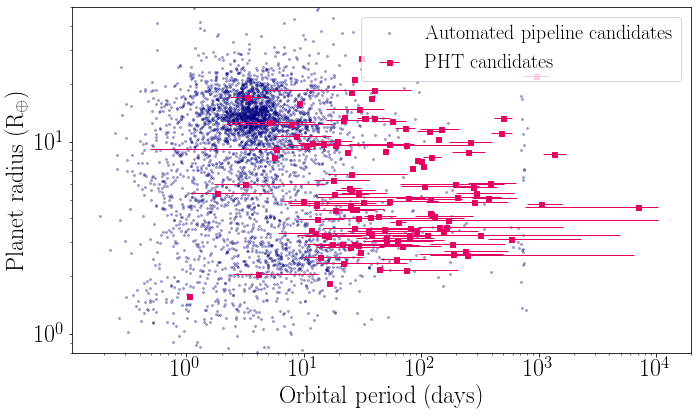

In [4]:
from matplotlib import rc
from astroquery.mast import Catalogs
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import FormatStrFormatter

# format the plot
rc('text', usetex=True)
rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
plt.rcParams['xtick.labelsize']=23
plt.rcParams['ytick.labelsize']=23

# set up figure 
fig, ax = plt.subplots(figsize=(10,6))

# plot the TOIs in blue
plt.plot(tois['Orbital Period Value'], tois['Planet Radius Value'] ,ms = 2, linewidth = 0, marker = 'o', color = 'navy', alpha = 0.3, label = 'Automated pipeline candidates', zorder = -2)

# plot the planet hunters identified candidates in magenta
plt.errorbar(candidates_pht['period_PHT'], candidates_pht['planet_radius'], xerr = np.array([candidates_pht['period err neg'], candidates_pht['period err pos']]), lw = 0, ms = 5, marker = 's', mec = '#e60063', color = '#e60063', alpha = 1, zorder = 1, elinewidth = 1, ecolor = '#e60063', label = 'PHT candidates')
plt.errorbar(candidates_others['Period (days)'], candidates_others['Radius (R_Earth)'], xerr = np.array([candidates_others['Period (days) Error'], candidates_others['Period (days) Error']]), lw = 0, ms = 5, marker = 's', mec = '#e60063', color = '#e60063', alpha = 1, zorder = 1, elinewidth = 1, ecolor = '#e60063')

# set up the figure 
ax.set_yscale('log')
ax.set_xscale('log')
plt.ylabel(r"${\rm Planet~radius~(R_{\oplus})}$", fontsize = 24)
plt.xlabel("Orbital period (days)", fontsize = 24)

ax.tick_params(axis='both', which='major', labelsize=24)
ax.tick_params(axis='both', which='minor', labelsize=24)

plt.legend(fontsize=20, loc=1)
plt.ylim(0.8,50)
plt.xlim(0,2e4)
plt.subplots_adjust(hspace = 0, top=0.98, right = 0.98, bottom = 0.18, left = 0.12) 

#plt.savefig("./figures/PHT_candidate_period_radius_plot.png", dpi = 300)
#plt.savefig("./figures/PHT_candidate_period_radius_plot.pdf")

**Figure 1.** The PHT planet candidates (magenta squares) compared to the automated pipeline found candidates (blue dots), highlighting the different region of parameter space filled in by the two different search methods. Values of the orbital periods and planet radii were obtained via transit modelling using the open source software *pyaneti* (Barragan et al [2021](https://arxiv.org/abs/2109.14086), [GitHub](https://github.com/oscaribv/pyaneti))
The orbital period of single transit events are poorly constrained, which is reflected by the large errorbars.

In [5]:
# ---- plot the properties of the host stars using MIST stellar evolution tracks ----
# ---- showing the longer period pipeline found planets compared to the PHT candidates ----

In [6]:
import warnings
from glob import glob
warnings.filterwarnings('ignore')

# import the MIST stellar evolution tracks
ee_files = sorted(glob('./MIST_eep/*'))


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


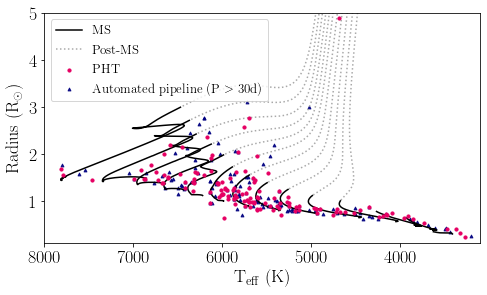

In [7]:
rc('text', usetex=True)
rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
plt.rcParams['xtick.labelsize']=18
plt.rcParams['ytick.labelsize']=18

fig, ax = plt.subplots(figsize=(7,4))

# import the MIST stellar evolution tracks
phase0 = pd.read_csv('./MIST_eep/eep_phase0.csv') # these are the main-sequence tracks
phase2 = pd.read_csv('./MIST_eep/eep_phase2.csv') # these are the post main-sequence tracks

# I only consider TOIs where the radius of the planet is less than around two jupiter radii to be real
tois_real = tois[tois['Planet Radius Value'] < 22]

tois_real_long_period = tois_real[tois_real['Orbital Period Value'] >= 30]
tois_real_short_period = tois_real[tois_real['Orbital Period Value'] < 30]

for i in range(300,1700, 100): # we have evolutionary tracks from 0.3 M_sun to 1.6 M_sun in steps of 0.1
    colname_phase0_T = (str(i).rjust(6, "0")) + '0M_phase0_T'
    colname_phase0_R = (str(i).rjust(6, "0")) + '0M_phase0_R'

    colname_phase2_T = (str(i).rjust(6, "0")) + '0M_phase2_T'
    colname_phase2_R = (str(i).rjust(6, "0")) + '0M_phase2_R'

    phase0_T = phase0[colname_phase0_T]
    phase0_R = phase0[colname_phase0_R]

    phase2_T = phase2[colname_phase2_T]
    phase2_R = phase2[colname_phase2_R]

    # the -99 values are just there as padding to make the lists the same length -- we dont' need them to mask out.
    mask0 = (phase0_T != -99) & (phase0_R != -99)
    mask2 = (phase2_T != -99) & (phase2_R != -99)

    # plot the 1 Solar Mass track in a different colour to make it stand out - easier for reference.
    if i == 1000:
        plt.plot(phase0_T[mask0],phase0_R[mask0], 'k', zorder = -1, label = 'MS')#, lw = 2.5)
        plt.plot(phase2_T[mask2],phase2_R[mask2], 'darkgrey', linestyle = ':', zorder = -1, label = 'Post-MS') #, lw = 2.5)
    else:
        plt.plot(phase0_T[mask0], phase0_R[mask0], 'k', zorder = -1)
        plt.plot(phase2_T[mask2],phase2_R[mask2], 'darkgrey', linestyle = ':', zorder = -1)

# plot the PHT candidates
plt.scatter(ctois['Stellar Eff Temp (K)'], ctois['Stellar Radius (R_Sun)'], c= '#e60063', s = 10, zorder = 1, label = r'PHT')

#plot the long period (> 30 days) TOIs
plt.scatter(tois_real_long_period['Effective Temperature Value'], tois_real_long_period['Star Radius Value'], marker = '^', zorder = -1, c = 'navy', alpha = 0.9, s = 8, label = r'Automated pipeline (P $>$ 30d)')

plt.xlim(plt.xlim()[::-1])
plt.ylim(0.1,5)
plt.xlabel(r"${\rm T_{eff}~(K)}$", fontsize = 18)
plt.ylabel(r"${\rm Radius~(R_{\odot})}$", fontsize = 18)
plt.xlim(8000,3100)

plt.subplots_adjust(hspace = 0, top=0.98, right = 0.965, bottom = 0.18, left = 0.1) 
plt.legend(fontsize = 13)

plt.savefig("./figures/PHT_eep_period_dependency.png", dpi = 300)
#plt.savefig("./figures/PHT_eep.pdf")
plt.show()

**Figure 2.** .  Stellar evolution tracks showing MS (solid black lines) and post-MS (dashed grey lines) evolution for stellar masses ranging from 0.3 to 1.6 solar mass in steps of 0.1 solar masses (Choi et al. 2016). The PHT identified candidates are shown by magenta circles and the TESS automated pipeline candidates with periods longer than 30 days are depicted by navy triangles. This figure highlights that PHT can identify planets around subgiant stars and shows a lack of longer period pipeline identified planets.

In [8]:
# ---- plot the properties of the host stars using MIST stellar evolution tracks ----
# ---- showing all the TOIs compared to the  PHT candiates ----

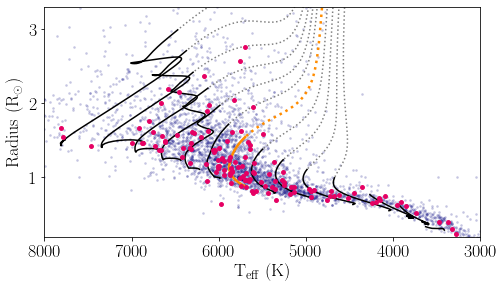

In [9]:
rc('text', usetex=True)
rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
plt.rcParams['xtick.labelsize']=18
plt.rcParams['ytick.labelsize']=18

fig, ax = plt.subplots(figsize=(7,4))

# import the MIST stellar evolution tracks
phase0 = pd.read_csv('./MIST_eep/eep_phase0.csv') # these are the main-sequence tracks
phase2 = pd.read_csv('./MIST_eep/eep_phase2.csv') # these are the post main-sequence tracks

# I only consider TOIs where the radius of the planet is less then two jupiter radii to be real
tois_real = tois[tois['Planet Radius Value'] < 22]

#Orbital Period Value
#Planet Radius Value

for i in range(300,1700, 100): # we have evolutionary tracks from 0.3 M_sun to 1.6 M_sun in steps of 0.1
    colname_phase0_T = (str(i).rjust(6, "0")) + '0M_phase0_T'
    colname_phase0_R = (str(i).rjust(6, "0")) + '0M_phase0_R'

    colname_phase2_T = (str(i).rjust(6, "0")) + '0M_phase2_T'
    colname_phase2_R = (str(i).rjust(6, "0")) + '0M_phase2_R'

    phase0_T = phase0[colname_phase0_T]
    phase0_R = phase0[colname_phase0_R]

    phase2_T = phase2[colname_phase2_T]
    phase2_R = phase2[colname_phase2_R]

    # the -99 values are just there as padding to make the lists the same length -- we dont' need them to mask out.
    mask0 = (phase0_T != -99) & (phase0_R != -99)
    mask2 = (phase2_T != -99) & (phase2_R != -99)

    # plot the 1 Solar Mass track in a different colour to make it stand out - easier for reference.
    if i == 1000:
        plt.plot(phase0_T[mask0],phase0_R[mask0], 'darkorange', zorder = -1, lw = 2.5)
        plt.plot(phase2_T[mask2],phase2_R[mask2], 'darkorange', linestyle = ':', zorder = -1, lw = 2.5)
    else:
        plt.plot(phase0_T[mask0], phase0_R[mask0], 'k', zorder = -1)
        plt.plot(phase2_T[mask2],phase2_R[mask2], 'grey', linestyle = ':', zorder = -1)


# plot the PHT candidates in magenta
plt.scatter(ctois['Stellar Eff Temp (K)'], ctois['Stellar Radius (R_Sun)'], c= '#e60063', s = 15, zorder = 1)

# plto the TOIs in navy
plt.scatter(tois_real['Effective Temperature Value'], tois_real['Star Radius Value'], zorder = -2, c = 'navy', alpha = 0.15, s = 3)

plt.xlim(plt.xlim()[::-1])
plt.ylim(0.2,3.3)
plt.xlabel(r"${\rm T_{eff}~(K)}$", fontsize = 18)
plt.ylabel(r"${\rm Radius~(R_{\odot})}$", fontsize = 18)
plt.xlim(8000,3000)

plt.subplots_adjust(hspace = 0, top=0.98, right = 0.965, bottom = 0.18, left = 0.1) 

#plt.savefig("./figures/PHT_eep.png", dpi = 300)
#plt.savefig("./figures/PHT_eep.pdf")

plt.show()

**Figure 3.** Stellar evolution tracks showing main sequence (solid black lines) and post-main sequence (dashed grey lines) MIST stellar evolution for stellar masses ranging from 0.3 to 1.6 solar mass in steps of 0.1 solar mass. The orange evololution track shows corresponds to 1 Solar mass. The navy dots show the TOIs and the magenta circles show the PHT candidates. This figure highlights that PHT is able to find planet candidates around stars with a wide range of properties as well as at different stages of their evololution. 

In [10]:
# ---- plot the properties of the host stars using MIST stellar evolution tracks ----

In [11]:
# import the full list of planets from the NASA Exoplanet archive 
#links: https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PSCompPars

allplanets = pd.read_csv("./NASA_exoplanet_archive.csv", comment = '#')

# sort by detection method
allplanets_tr = allplanets[allplanets['discoverymethod'] == 'Transit']
allplanets_rv = allplanets[allplanets['discoverymethod'] == 'Radial Velocity']


**Figure 3.** Stellar evolution tracks showing main sequence (solid black lines) and post-main sequence (dashed grey lines) MIST stellar evolution for stellar masses ranging from 0.3 to 1.6 solar mass in steps of 0.1 solar mass. The magenta evololution track shows corresponds to 1 Solar mass. The navy dots show the TOIs and the magenta circles show the PHT candidates. This figure highlights that PHT is able to find planet candidates around stars with a wide range of properties as well as at different stages of their evololution. 

In [12]:
end_MS_Teff = []
end_MS_logR = []

ee_files = sorted(glob('/Users/Nora/Documents/research/projects/Inactive/method_paper/MIST_eep/*'))


for ee_file in ee_files:

    eep2 = np.genfromtxt(ee_file, skip_header = 11, names = True)
    eep2_phase0 = eep2[eep2['phase'] == 0]
    
    eep2_phase2 = eep2[eep2['phase'] == 2]
    
    end_MS_Teff.append(eep2_phase0['log_Teff'][-1] - 0.005)
    end_MS_logR.append(eep2_phase0['log_R'][-1] + 0.001)
    
    #plt.plot(10**eep2_phase0['log_Teff'], 10**(eep2_phase0['log_R']), 'k', zorder = -1)
    #plt.plot(10**eep2_phase2['log_Teff'], 10**(eep2_phase2['log_R']), 'grey', linestyle = ':', zorder = -1)
    

In [13]:
# determine the cut-off for the evolved stars
# coefficients for 'end of MS polynomial'
p0 = 34.13630882
p1 = -374.22765914
p2 = 1370.14822645
p3 = -1675.42256436

xp = np.linspace(3,3.9, 100)
y = (p0*xp**3) + (p1*xp**2)  + (p2*xp) + p3


In [14]:
# use this cut-off to determine how many planets there are 

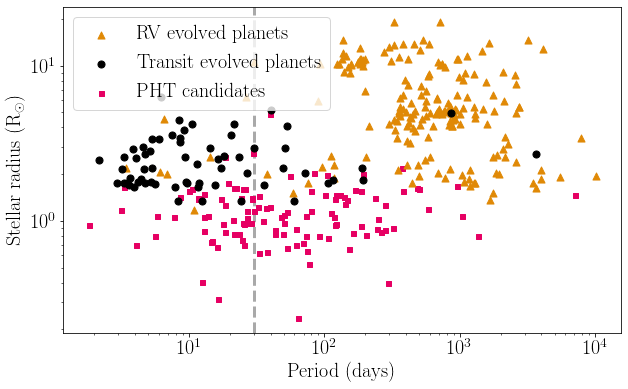

In [16]:
rc('text', usetex=True)
rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
plt.rcParams['xtick.labelsize']=18
plt.rcParams['ytick.labelsize']=18

# define the figure
fig, ax = plt.subplots(figsize=(10,6))

# extarct the properties from the list of exoplanet archive planets - detected with the transit method
per = allplanets_tr['pl_orbper']
teff = allplanets_tr['st_teff']
rad = allplanets_tr['st_rad']
per_rv = allplanets_rv['pl_orbper']
teff_rv = allplanets_rv['st_teff']
rad_rv = allplanets_rv['st_rad']

# create a masks to use to extract the post-MS stars
mask = (rad > (10**((p0*np.log10(teff)**3) + (p1*np.log10(teff)**2)  + (p2*np.log10(teff)) + p3))) & (teff > 4500)
mask_rv = (rad_rv > (10**((p0*np.log10(teff_rv)**3) + (p1*np.log10(teff_rv)**2)  + (p2*np.log10(teff_rv)) + p3))) & (teff_rv > 4500)

# mask the data
per_masked_rv = per_rv[mask_rv]
rad_masked_rv = rad_rv[mask_rv]
per_masked = per[mask]
rad_masked = rad[mask]

# plot the NASA archive evolved transiting and VR detected planets
plt.scatter(per_masked_rv, rad_masked_rv, color = '#e08906', marker = '^', label = 'RV evolved planets', s = 50)
plt.scatter(per_masked, rad_masked,  color = 'k', label = 'Transit evolved planets', s = 50)

# plot the PHT candidates
plt.scatter(candidates_pht['period_PHT'], candidates_pht['Stellar Radius (R_Sun)'], c= '#e60063', s = 25, marker = 's', zorder = -1, label = r'PHT candidates')

# axes
plt.xscale("log")
plt.yscale("log")
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)


plt.legend(fontsize = 20, loc = 2)
plt.xlabel("Period (days)", fontsize = 20)
plt.ylabel(r"${\rm Stellar~radius~(R_{\odot})}$", fontsize = 20)

plt.axvline(30, linestyle = '--', color = 'darkgrey', lw = 3, zorder = -10)

# save figure
plt.savefig("./figures/RV_transit_PHT_planets.png", dpi = 300)


**Figure 4.** The sample of confirmed exoplanets listed in the NASA Exoplanet archive highlighting the differences between the population of evolved planets detected using the transit method (black circle) and the radial velocity (RV) method (orange triangles).  The PHT planet candidates (pink squares) highlight that the citizen science approach is sensitive a period range where automated transit detection pipelines struggle (> 30 days, grey dashed line) and its ability to probe currently under-sampled period range.